In [36]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


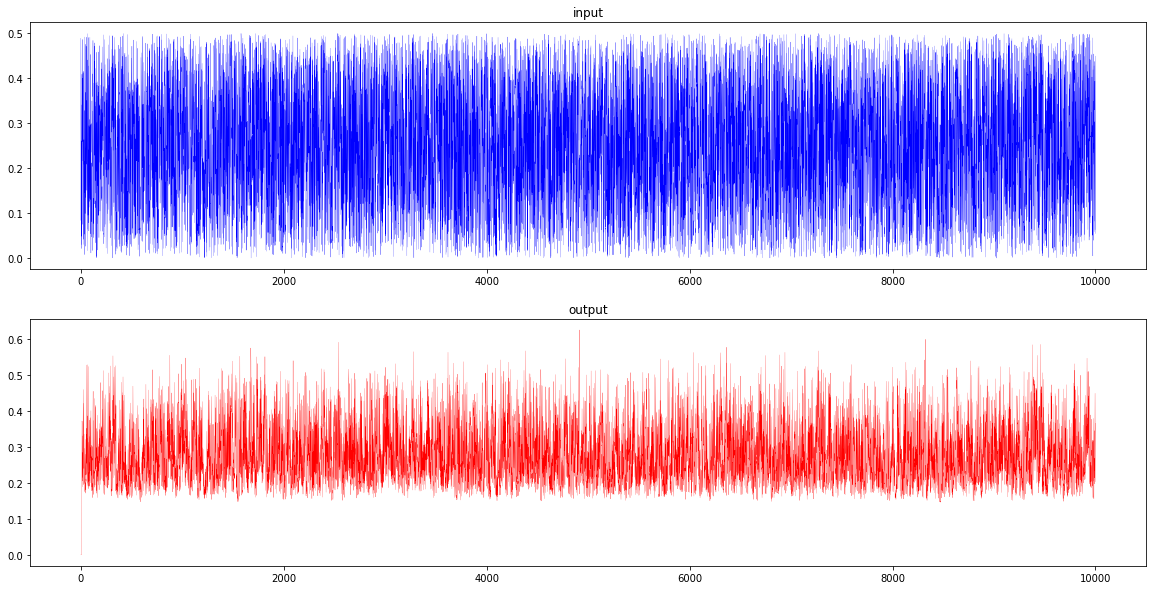

In [38]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [39]:
def create_RNN(hidden_units,dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0], return_sequences=True)) #stateful = True
    model.add(Dense(units=dense_units, activation=activation[1]))
    learning_rate = 0.01
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [40]:
model = create_RNN(20, 1 , (len(x_train),1), activation=['tanh', 'tanh'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 4000, 20)          440       
                                                                 
 dense_3 (Dense)             (None, 4000, 1)           21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [41]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[-0.44027695  0.16596448  0.47653908 -0.51486766 -0.03274053  0.15667194
   0.2115258   0.19733906  0.01101238  0.31733578  0.21048743 -0.14518434
   0.2679016   0.31105143 -0.04352996 -0.17971984  0.40844625  0.3223582
   0.37184203 -0.46680337]]  wh =  [[-0.14114296  0.04610913  0.13878797  0.07211126 -0.10327485  0.12459102
   0.33654967  0.02416839  0.32565954  0.0972997   0.09796645 -0.0095048
  -0.06153312  0.11404239 -0.42526624 -0.19945864 -0.34637466  0.4121853
  -0.14102502 -0.3755736 ]
 [ 0.46343336  0.13998066 -0.07664233  0.23715529  0.19870296  0.15871951
  -0.3240311   0.09829525  0.35269305  0.01295072 -0.12297726 -0.0799076
  -0.11300353 -0.032873   -0.2638492  -0.07741474  0.33847696  0.15493931
  -0.33927813  0.1870144 ]
 [-0.04332454  0.00119919  0.35574523  0.02808948  0.15901321 -0.22729442
  -0.27102906 -0.00935728 -0.07090746 -0.1589846   0.26866168  0.04314167
   0.10002282 -0.37715024  0.15539494 -0.19196162 -0.22056417 -0.14835978
  -0.53848094 -0.2051

In [42]:
print(x_train.shape)

(4000,)


In [43]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train, epochs = 200).history




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 295ms/step - loss: 0.0421
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.0421
Epoch 2/200
1/1 [==============================] - 0s 378ms/step - loss: 0.0316
Epoch 3/200
1/1 [==============================] - 0s 374ms/step - loss: 0.0295
Epoch 4/200
1/1 [==============================] - 0s 376ms/step - loss: 0.0289
Epoch 5/200
1/1 [==============================] - 0s 380ms/step - loss: 0.0269
Epoch 6/200
1/1 [==============================] - 0s 370ms/step - loss: 0.0242
Epoch 7/200
1/1 [==============================] - 0s 410ms/step - loss: 0.0214
Epoch 8/200
1/1 [==============================] - 0s 383ms/step - loss: 0.0191
Epoch 9/200
1/1 [==============================] - 0s 372ms/step - loss: 0.0176
Epoch 10/200
1/1 [==============================] - 0s 397ms/step - loss: 0.0167
Epoch 11/200
1/1 [==============================] - 0s 378ms/step - loss: 0.0161
E

KeyError: 'variable'

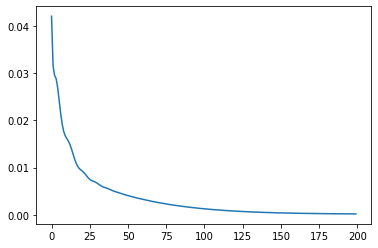

In [49]:
plt.plot(history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 41ms/step - loss: 2.2185e-04


0.00022185122361406684

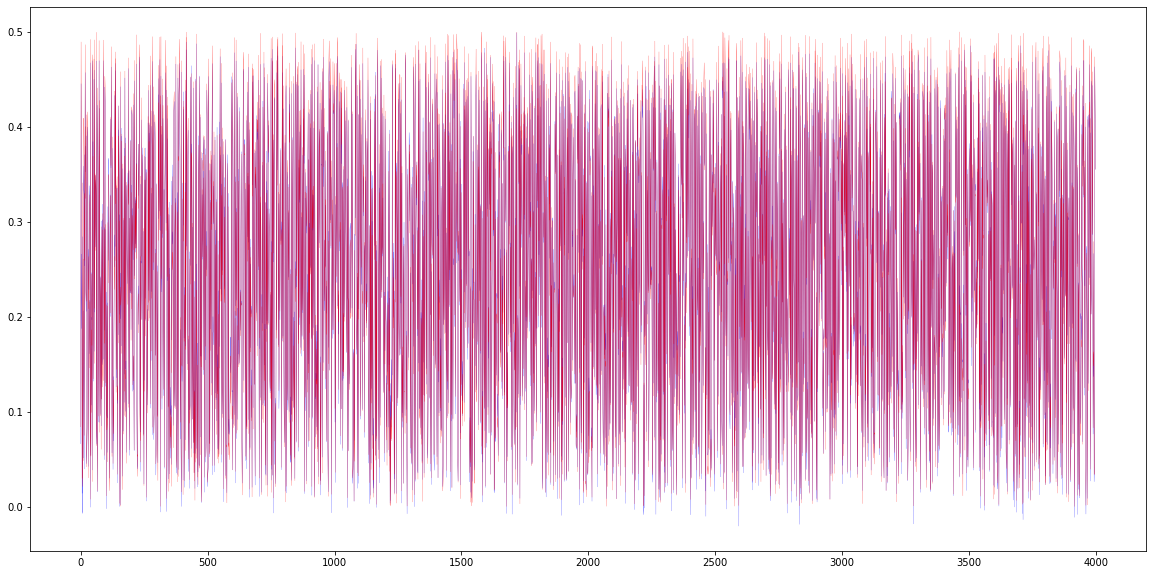

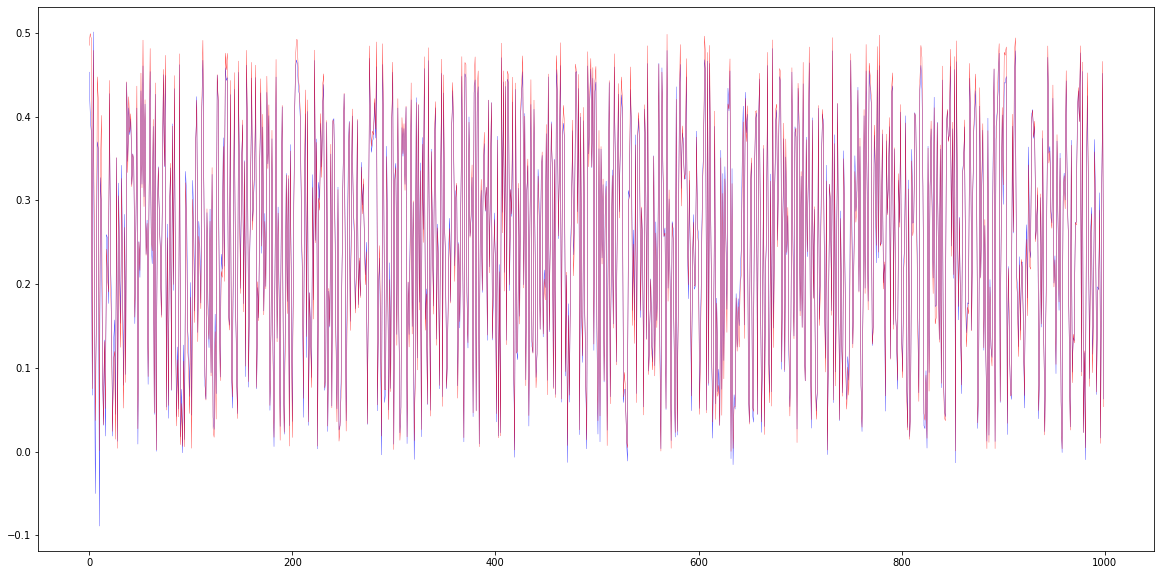

In [47]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)


y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)
